# Data Science Study Part 1


C:\Users\xboxm\AppData\Local\Temp\ipykernel_2376\1081593990.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["surface_area"], axis=1, inplace=True)


Task 1:


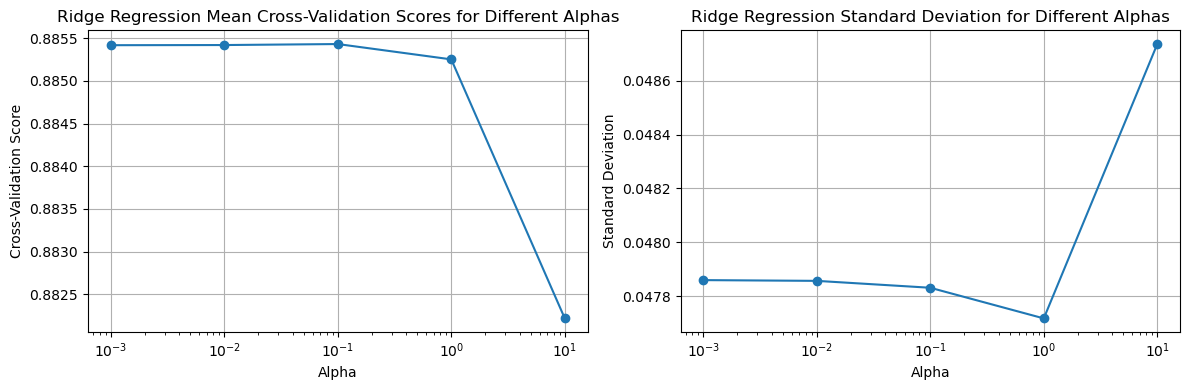

Optimal Alpha parameter:  0.1


,Alpha,Mean Cross Validation Score,Standart Deviation
0,0.001,0.885418,0.047859
1,0.010,0.885420,0.047856
2,0.100,0.885431,0.047831
3,1.000,0.885252,0.047717
4,10.000,0.882217,0.048737


,Mean Cross Validation Score,Standart Deviation
Y1,0.996715,0.004030
Y2,0.996511,0.004731


Task 2:
Optimal Random Forest parameters:  {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


,Mean Cross Validation Score,Standart Deviation
Y1,0.911802,0.15266
Y2,0.919176,0.11464


Mean Absolute Error              Mean Squared Error             
       RidgeRegression RandomForest    RidgeRegression RandomForest
Y1           2.13±0.24    0.31±0.04          8.83±1.75    0.22±0.07
Y2           2.30±0.27    1.08±0.17         10.52±2.70    3.37±0.90

In [9]:

def problem1(filename):
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV
    import pandas as pd
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import RepeatedKFold
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import StandardScaler
    import matplotlib.pyplot as plt
    import numpy as np

    def RidgeReg_Tuner(x,y):
        alphas=[0.001,0.01,0.1, 1.0, 10.0]
        score_list=[]
        std_list=[]

        for i in range(len(alphas)):
            model_ridge=Ridge(alpha=alphas[i])

            scores=cross_val_score(model_ridge,x,y,cv=10)
            score_list.append(scores.mean())
            std_list.append(scores.std())

        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        #subplot for Mean Cross-Validation Scores
        axs[0].plot(alphas, score_list, marker='o')
        axs[0].grid(True)
        axs[0].set_xscale('log')
        axs[0].set_xlabel('Alpha')
        axs[0].set_ylabel('Cross-Validation Score')
        axs[0].set_title('Ridge Regression Mean Cross-Validation Scores for Different Alphas')

        #subplot for Standard Deviation
        axs[1].plot(alphas, std_list, marker='o')
        axs[1].grid(True)
        axs[1].set_xscale('log')
        axs[1].set_xlabel('Alpha')
        axs[1].set_ylabel('Standard Deviation')
        axs[1].set_title('Ridge Regression Standard Deviation for Different Alphas')

        plt.tight_layout()
        plt.show()


        print("Optimal Alpha parameter: ",alphas[score_list.index(max(score_list))])


        best_alpha=alphas[score_list.index(max(score_list))]
        param_ridge_results=pd.DataFrame()
        param_ridge_results["Alpha"]=alphas
        param_ridge_results["Mean Cross Validation Score"]=score_list
        param_ridge_results["Standart Deviation"]=std_list

        return best_alpha,param_ridge_results

    def RandomForest_Tuner(x,y):

        grid_space={'n_estimators':[10,50,100,250,500],
                    'max_depth':[50,150,250],
                    'min_samples_leaf':[1,2,3],
                    'min_samples_split':[2,3],

                }
        rf = RandomForestRegressor(random_state=42)
        grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='neg_mean_squared_error')
        model_grid = grid.fit(x,y)
        print("Optimal Random Forest parameters: ",model_grid.best_params_)

        return model_grid.best_params_

    def cross_validator(model):

        kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
        mae_scores = []
        mse_scores = []
        score_list=[]
        std_list=[]

        for train_index, test_index in kf.split(x):
        
            X_train, X_test = x.iloc[train_index], x.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            scores_y1=cross_val_score(model,X_test,y_pred[:,0],cv=10)
            score_list.append(scores_y1.mean())
            std_list.append(scores_y1.std())

            scores_y2=cross_val_score(model,X_test,y_pred[:,1],cv=10)
            score_list.append(scores_y2.mean())
            std_list.append(scores_y2.std())

            mae_y1=  mean_absolute_error(y_test["HL"], y_pred[:,0])
            mae_y2=  mean_absolute_error(y_test["CL"], y_pred[:,1])

            mse_y1=  mean_squared_error(y_test["HL"], y_pred[:,0])
            mse_y2=  mean_squared_error(y_test["CL"], y_pred[:,1])

            mae_scores.append(mae_y1)
            mae_scores.append(mae_y2)
            mse_scores.append(mse_y1)
            mse_scores.append(mse_y2)

        # Calculate mean and standard deviation of MAE and MSE scores

        score_list=np.array(score_list).reshape(-1, 2)
        std_list=np.array(std_list).reshape(-1, 2)

        validation_scores=pd.DataFrame(columns=["Mean Cross Validation Score","Standart Deviation"])
        y1=np.mean(score_list[:,0]),np.mean(std_list[:,0])
        y2=np.mean(score_list[:,1]),np.mean(std_list[:,1])
        validation_scores.loc[len(validation_scores)] = y1
        validation_scores.loc[len(validation_scores)] = y2
        validation_scores.index=["Y1","Y2"]



        mae_scores=np.array(mae_scores).reshape(-1, 2)
        mse_scores=np.array(mse_scores).reshape(-1, 2)

        results_reg=pd.DataFrame(columns=["MAE_mean","MAE_std","MSE_mean","MSE_std"])

        y1=[np.mean(mae_scores[:,0]),np.std(mae_scores[:,0]),np.mean(mse_scores[:,0]),np.std(mse_scores[:,0])]
        y2=[np.mean(mae_scores[:,1]),np.std(mae_scores[:,1]),np.mean(mse_scores[:,1]),np.std(mse_scores[:,1])]

        results_reg.loc[len(results_reg)] = y1
        results_reg.loc[len(results_reg)] = y2
        results_reg.index=["Y1","Y2"]

        return results_reg,validation_scores

    def tabular_form(results_ridge_reg,results_rand_forest):
        results=pd.DataFrame(columns=["RidgeRegression","RandomForest","RidgeRegression","RandomForest"])
        for i in range(2):
            results_row=[]
            for m in [0,2]:
                row_data1 = f"{results_ridge_reg.values[i][m]:.2f}±{results_ridge_reg.values[i][m+1]:.2f}"
                results_row.append(row_data1)
                row_data2 = f"{results_rand_forest.values[i][m]:.2f}±{results_rand_forest.values[i][m+1]:.2f}"
                results_row.append(row_data2)

            results.loc[len(results)] = results_row
    
        results.index=["Y1","Y2"]


        sub_columns = ['Mean Absolute Error','Mean Absolute Error','Mean Squared Error','Mean Squared Error']  


        multi_index = pd.MultiIndex.from_tuples(zip(sub_columns, results.columns))


        results.columns = multi_index

        return results


    df=pd.read_excel("ENB2012_data.xlsx")
    features=["relative_compactness", "surface_area", "wall_area", "roof_area",
    "overall_height", "orientation", "glazing_area", "glazing_area_distribution"]
    outputs=["HL","CL"]
    labels=features+outputs
    df.columns=labels

    x=df[features]
    y=df[outputs]

    x = df[features]
    x.drop(["surface_area"], axis=1, inplace=True)
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    print("Task 1:")
    optimal_alpha,param_ridge_results=RidgeReg_Tuner(x_scaled,y)
    display(param_ridge_results)
    results_ridge_reg,validation_scores_ridge=cross_validator(Ridge(alpha=optimal_alpha))
    display(validation_scores_ridge)

    print("Task 2:")
    optimal_rf_params=RandomForest_Tuner(x_scaled,y)
    results_rand_forest,validation_scores_rf=cross_validator(RandomForestRegressor(**optimal_rf_params,random_state=42))
    display(validation_scores_rf)
    results=tabular_form(results_ridge_reg,results_rand_forest)

    display(results)

filename_problem1="ENB2012_data.xlsx" #path
problem1(filename_problem1)

Task 1:


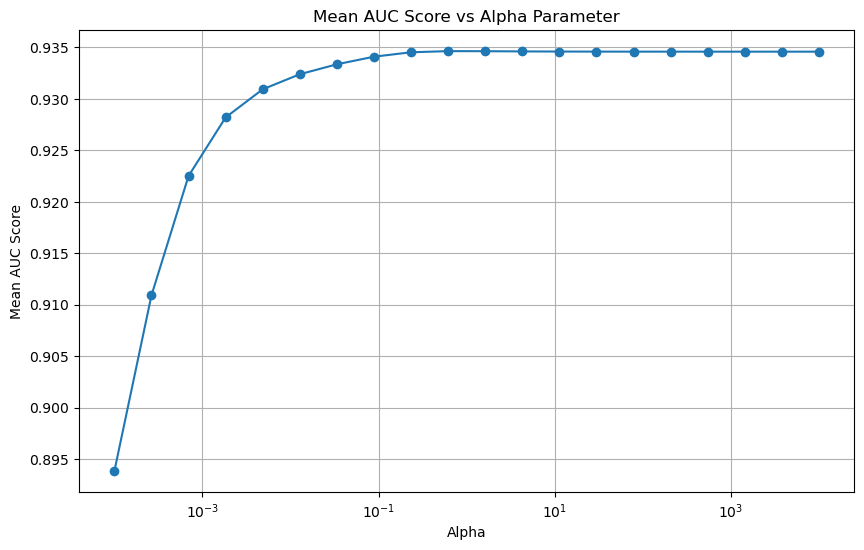

Classification Report of Log. Regression Model with Test Data:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

optimal regression parameters:  {'C': 0.615848211066026}
Score for optimal parameters:  0.9346423082575912
Task 2:
Classification Report of Rand. Forest Model with Test Data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7303
           1       0.69      0.42      0.53       935

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

optimal rand. forest parameters:  {'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estima

In [10]:
def problem2(filename):
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import train_test_split, GridSearchCV,RepeatedStratifiedKFold
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    from sklearn.impute import SimpleImputer
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.ensemble import RandomForestClassifier
    import numpy as np
    from sklearn.preprocessing import LabelEncoder


    def preproc_(df):

        numeric_features = ['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])

        categorical_features = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()) 
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])


        X_transformed = preprocessor.fit_transform(df)
        return X_transformed

    def log_regression_tuner(model,params,kf):


        grid_search = GridSearchCV(model, params,cv=kf,scoring='roc_auc')
        grid_search.fit(X_train, y_train)

        results = grid_search.cv_results_
        mean_auc_scores = results['mean_test_score']
        c_params = params['C']

        plt.figure(figsize=(10, 6))
        plt.plot(c_params, mean_auc_scores, marker='o')
        plt.title('Mean AUC Score vs Alpha Parameter')
        plt.xscale('log')
        plt.xlabel('Alpha')
        plt.ylabel('Mean AUC Score')
        plt.grid(True)
        plt.show()

        best_c = grid_search.best_params_['C']
        model.set_params(C=best_c)
        model.fit(X_train, y_train)  

        print("Classification Report of Log. Regression Model with Test Data:")
        y_pred = grid_search.predict(X_test)
        print(classification_report(y_test, y_pred))
        
        return model,grid_search.best_params_,grid_search.best_score_

    def rand_forest_tuner (model,grid_space,kf):

        grid = GridSearchCV(model,param_grid=grid_space,cv=kf,scoring='roc_auc')    
        grid = grid.fit(X_train,y_train)
        
        best_params = grid.best_params_
        
    
        model.set_params(**best_params)
        model.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
        

        print("Classification Report of Rand. Forest Model with Test Data:")
        print(classification_report(y_test, y_pred))
        return model, best_params, grid.best_score_

    def nn_tuner(model,parameter_space,kf):

        
        clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=kf, scoring='roc_auc')
        clf.fit(X_train, y_train)


        y_prob = clf.predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.5).astype(int)
        
        print("Classification Report of NN Model with Test Data:")
        print(classification_report(y_test, y_pred))
        return clf.best_estimator_, clf.best_params_, clf.best_score_

    
    df=pd.read_csv(filename,sep=";")

    x=df[df.columns[:-1]]
    y=df[df.columns[-1]]


    label_encoder = LabelEncoder()

    transformed_x=preproc_(x)
    transformed_y=label_encoder.fit_transform(y)


    X_train, X_test, y_train, y_test = train_test_split(transformed_x, transformed_y, test_size=0.2, random_state=42)


    #TASK 1
    print("Task 1:")
    reg_model=LogisticRegression(random_state=42, max_iter=1000)
    reg_params={'C': np.logspace(-4, 4, 20)}
    reg_kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    tuned_reg_model,opt_reg_params,opt_reg_best_score=log_regression_tuner(reg_model,reg_params,reg_kf)

    print("optimal regression parameters: ",opt_reg_params)
    print("Score for optimal parameters: ",opt_reg_best_score)

    #TASK 2
    print("Task 2:")
    rf_model=RandomForestClassifier(random_state=42)
    rf_kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    rf_params={'n_estimators':[10,50,100,250,500,1000],
                    'max_depth':[50,150,250],
                    'min_samples_leaf':[1,2,3],
                    'min_samples_split':[2,3],}
    tuned_rf_model,opt_rf_params,opt_rf_best_score=rand_forest_tuner(rf_model,rf_params,rf_kf)

    print("optimal rand. forest parameters: ",opt_rf_params)
    print("Score for optimal parameters: ",opt_rf_best_score)


    #TASK 3
    print("Task 3:")
    nn_model=(MLPClassifier(random_state=42, max_iter=1000))
    nn_params= {
        'hidden_layer_sizes': [(10, 10, 10), (10, 10, 10, 10),(10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10)],
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
        }
    nn_kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    tuned_nn_model,opt_nn_params,opt_nn_best_score=nn_tuner(nn_model,nn_params,nn_kf)

    print("optimal nn parameters: ",opt_nn_params)
    print("Score for optimal parameters: ",opt_nn_best_score)

    #TASK 4
    print("Task 4:")

    y_pred_reg = tuned_reg_model.predict(transformed_x)
    print("Classification Report with Logistic Regression")
    print(classification_report(transformed_y, y_pred_reg))


    y_pred_rf = tuned_rf_model.predict(transformed_x)
    print("Classification Report with Random Forest")
    print(classification_report(transformed_y, y_pred_rf))


    y_pred_nn = tuned_nn_model.predict(transformed_x)
    print("Classification Report with Neural Networks")
    print(classification_report(transformed_y, y_pred_nn))



    

filename_problem2="bank-additional-full.csv" #path
problem2(filename_problem2)

